**Note:** This notebook contains the complete code used in the accompanying project report on PCA simulations. It is intended as a supplementary resource for reproducibility and validation. For detailed explanations and interpretations, please refer to the written project thesis.

# Gaussian normal distribution

This notebook demonstrates how to simulate and visualize a bivariate (2D) Gaussian distribution. It focuses on building both an intuitive and graphical understanding of multivariate normal data.

We begin by generating a set of 2D samples from a Gaussian distribution with a given mean vector and covariance matrix. Using this simulated dataset, we analyze and visualize the underlying probability distribution from multiple perspectives.

The key steps include:

- Simulating 2D normal data with a fixed random seed for reproducibility.

- Creating a grid to evaluate the theoretical probability density function (PDF) of the distribution.

- Plotting:

    - A 2D contour plot overlaid with the sample points.

    - A histogram-based density map with PDF contours.

    - A 3D surface plot of the PDF.

    - A 3D bar plot representing the empirical distribution (histogram) of the samples.

Together, these plots provide a comprehensive comparison between the theoretical distribution and the empirical data, helping to build intuition for how 2D Gaussian distributions behave.

This notebook serves as a visual introduction to multivariate normal distributions and lays the groundwork for Principal Component Analysis (PCA).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import multivariate_normal

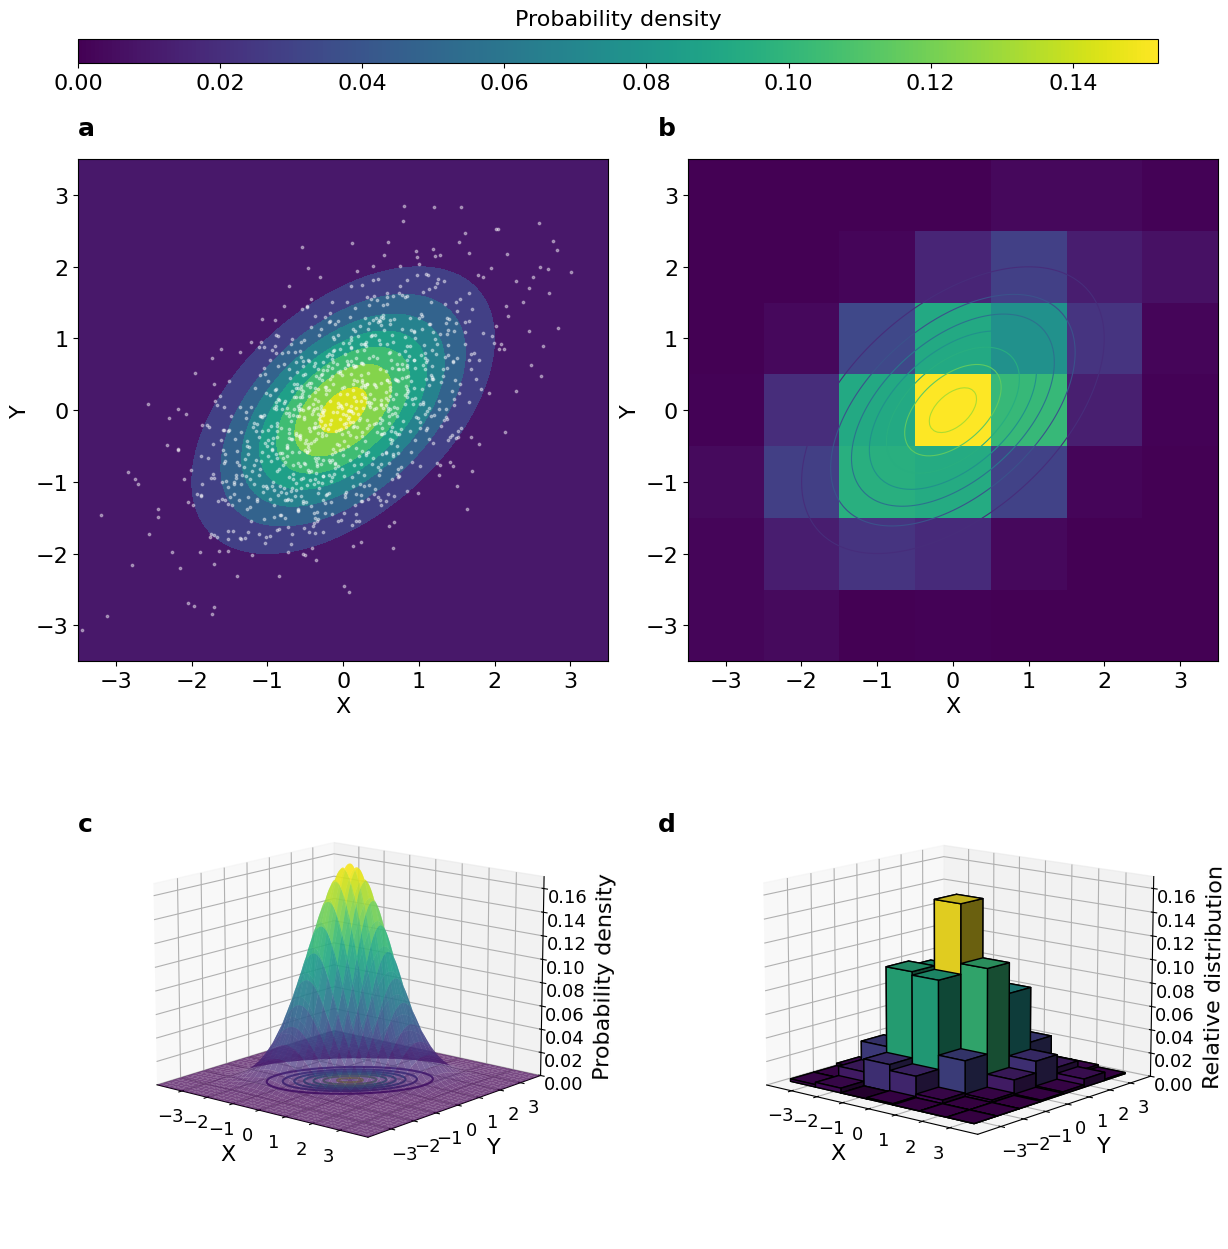

In [3]:
# Generate multivariate normal samples with a fixed seed
def generate_samples(mean, cov, size, seed=23102003):
    rng = np.random.default_rng(seed)
    return rng.multivariate_normal(mean, cov, size)

# Generate grid and compute PDF values for the multivariate normal distribution
def compute_density_grid(mean, cov, grid_limits=(-4, 4.05, 0.05)):
    x, y = np.mgrid[grid_limits[0]:grid_limits[1]:grid_limits[2],
                   grid_limits[0]:grid_limits[1]:grid_limits[2]]
    pos = np.dstack((x, y))
    rv = multivariate_normal(mean, cov)
    pdf = rv.pdf(pos)
    return x, y, pos, pdf

# Compute 2D histogram of the samples
def compute_histogram(samples, bins=np.arange(-3.5, 4, 1)):
    hist, xedges, yedges = np.histogram2d(samples[:, 0], samples[:, 1],
                                          bins=bins, range=[[-4, 4], [-4, 4]], density=True)
    return hist, xedges, yedges

# Generate a 2x2 subplot figure with 2D and 3D visualizations
def plot_all(samples, x, y, pdf, hist, xedges, yedges):
    fig = plt.figure(figsize=(12, 12))
    letters = ['a', 'b', 'c', 'd']
    positions = [(0.15, 0.97), (1.6, 0.97), (0.15, 0.39), (1.6, 0.39)]
    for letter, (xpos, ypos) in zip(letters, positions):
        fig.text(xpos / 3, ypos, letter, fontsize=18, fontweight='bold')

    # 2D Density
    ax1 = fig.add_subplot(221)
    ax1.contourf(x, y, pdf, cmap='viridis')
    ax1.scatter(samples[:, 0], samples[:, 1], c='white', s=3, alpha=0.4)
    ax1.set_xlabel('X', fontsize="16")
    ax1.set_ylabel('Y', fontsize="16")
    ax1.set_xlim(-3.5, 3.5)
    ax1.set_ylim(-3.5, 3.5)
    ax1.tick_params(axis="both", labelsize=16)

    # 2D Histogram + Contour
    bins_2d = np.arange(-4.5, 5, 1)
    ax2 = fig.add_subplot(222)
    ax2.hist2d(samples[:, 0], samples[:, 1], bins=bins_2d,
               range=[[-4, 4], [-4, 4]], density=True, cmap='viridis')
    ax2.contour(x, y, pdf, cmap='viridis', linewidths=0.8)
    ax2.set_xlim(-3.5, 3.5)
    ax2.set_ylim(-3.5, 3.5)
    ax2.set_xlabel('X', fontsize="16")
    ax2.set_ylabel('Y', fontsize="16")
    ax2.tick_params(axis="both", labelsize=16)

    # 3D Density Plot
    X, Y = x, y
    Z = pdf
    ax3 = fig.add_subplot(223, projection='3d')
    ax3.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
    ax3.contour(X, Y, Z, zdir='z', offset=0, cmap='viridis')
    ax3.set_xlabel('X', fontsize="16", labelpad=10)
    ax3.set_ylabel('Y', fontsize="16", labelpad=10)
    ax3.set_zlabel('Probability density', fontsize="16", labelpad=10)
    ax3.set_xlim(4, -4)
    ax3.set_ylim(4, -4)
    ax3.set_zlim(0, 0.17)
    ax3.set_xticks(np.arange(-3, 4, 1))
    ax3.set_yticks(np.arange(-3, 4, 1))
    ax3.set_zticks(np.arange(0, 0.18, 0.02))
    ax3.view_init(elev=14, azim=130)
    ax3.set_box_aspect(None, zoom=0.85)
    ax3.tick_params(axis='both', labelsize=13)

    # 3D Histogram
    xpos, ypos = np.meshgrid(xedges[:-1] - 0.25,
                             yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = np.zeros_like(xpos)
    dx = dy = np.diff(xedges)[0]
    dz = hist.ravel()
    colors = plt.cm.viridis(dz / dz.max())
    ax4 = fig.add_subplot(224, projection='3d')
    ax4.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors, edgecolor='k', alpha=1)
    ax4.set_xlabel('X', fontsize='16', labelpad=10)
    ax4.set_ylabel('Y', fontsize='16', labelpad=10)
    ax4.set_zlabel('Relative distribution', fontsize='16', labelpad=10)
    ax4.set_xlim(4, -4)
    ax4.set_ylim(4, -4)
    ax4.set_zlim(0, 0.17)
    ax4.set_xticks(np.arange(-3, 4, 1))
    ax4.set_yticks(np.arange(-3, 4, 1))
    ax4.set_zticks(np.arange(0, 0.18, 0.02))
    ax4.set_box_aspect(None, zoom=0.85)
    ax4.view_init(elev=13, azim=130)
    ax4.tick_params(axis='both', labelsize=13) 

    # Colorbar
    cbar_ax = fig.add_axes([0.05, 1.03, 0.9, 0.02])
    norm = cm.colors.Normalize(vmin=0, vmax=dz.max())
    sm = cm.ScalarMappable(cmap='viridis', norm=norm)
    cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
    cbar.ax.xaxis.set_label_position('top')
    cbar.set_label('Probability density', labelpad=10, fontsize=16)
    cbar.ax.tick_params(labelsize=16)

    fig.subplots_adjust(left=0.05, right=1, bottom=0.05, top=0.95, wspace=0.15, hspace=0.15)
    plt.savefig("../../Latex/figures/1_density_gauss_data.pdf", bbox_inches='tight')
    plt.savefig("../../Latex/pictures/1_density_gauss_data.png", dpi=400, bbox_inches='tight')
    plt.show()


# Inputs
mean = np.array([0, 0])
cov = np.array([[1, 0.5], [0.5, 1]])
samples = generate_samples(mean, cov, size=1000)
x, y, pos, pdf = compute_density_grid(mean, cov)
hist, xedges, yedges = compute_histogram(samples)
plot_all(samples, x, y, pdf, hist, xedges, yedges)
